In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection and Data Cleaning

In [3]:
img = cv2.imread('sharapova.jpg')
img.shape

(555, 700, 3)

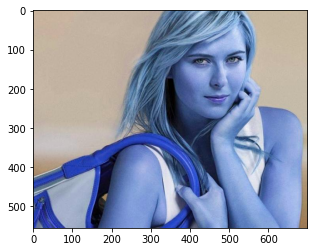

In [4]:
plt.imshow(img)

In [5]:
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

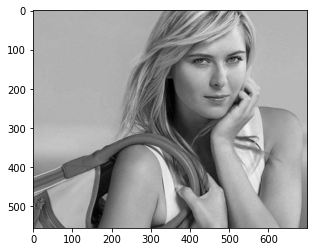

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h

(352, 38, 233, 233)

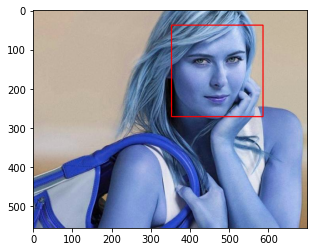

In [9]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

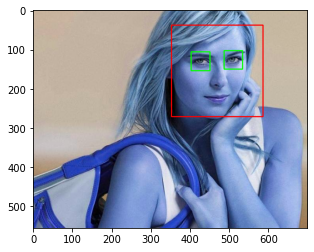

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

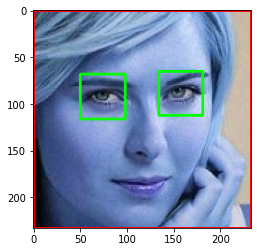

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

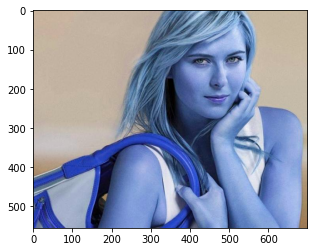

In [13]:
origin_img = cv2.imread('sharapova.jpg')
plt.imshow(origin_img)

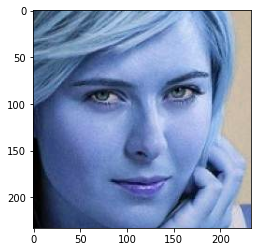

In [14]:
cropped_image = get_cropped_image_if_2_eyes('sharapova.jpg')
plt.imshow(cropped_image)

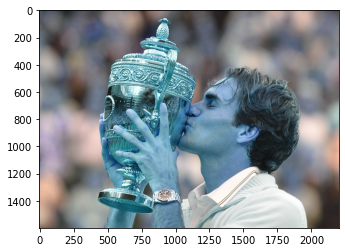

In [15]:
org_image_obstructed = cv2.imread('roger_federer.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('roger_federer.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data = './images_dataset/'
path_to_cr_data = './images_dataset/cropped/'

In [18]:
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/virat_kohli',
 './images_dataset/.svn']

In [19]:
img_dirs = img_dirs[:5]
img_dirs

['./images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/virat_kohli']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


In [22]:
cropped_image_dirs

['./images_dataset/cropped/roger_federer',
 './images_dataset/cropped/serena_williams',
 './images_dataset/cropped/lionel_messi',
 './images_dataset/cropped/maria_sharapova',
 './images_dataset/cropped/virat_kohli']

In [23]:
celebrity_file_names_dict

{'roger_federer': ['./images_dataset/cropped/roger_federer/roger_federer1.png',
  './images_dataset/cropped/roger_federer/roger_federer2.png',
  './images_dataset/cropped/roger_federer/roger_federer3.png',
  './images_dataset/cropped/roger_federer/roger_federer4.png',
  './images_dataset/cropped/roger_federer/roger_federer5.png',
  './images_dataset/cropped/roger_federer/roger_federer6.png',
  './images_dataset/cropped/roger_federer/roger_federer7.png',
  './images_dataset/cropped/roger_federer/roger_federer8.png',
  './images_dataset/cropped/roger_federer/roger_federer9.png',
  './images_dataset/cropped/roger_federer/roger_federer10.png',
  './images_dataset/cropped/roger_federer/roger_federer11.png',
  './images_dataset/cropped/roger_federer/roger_federer12.png',
  './images_dataset/cropped/roger_federer/roger_federer13.png',
  './images_dataset/cropped/roger_federer/roger_federer14.png',
  './images_dataset/cropped/roger_federer/roger_federer15.png',
  './images_dataset/cropped/roge

In [42]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'roger_federer': ['./images_dataset/cropped/roger_federer/roger_federer17.png',
  './images_dataset/cropped/roger_federer/roger_federer19.png',
  './images_dataset/cropped/roger_federer/roger_federer23.png',
  './images_dataset/cropped/roger_federer/roger_federer12.png',
  './images_dataset/cropped/roger_federer/roger_federer6.png',
  './images_dataset/cropped/roger_federer/roger_federer11.png',
  './images_dataset/cropped/roger_federer/roger_federer28.png',
  './images_dataset/cropped/roger_federer/roger_federer27.png',
  './images_dataset/cropped/roger_federer/roger_federer1.png',
  './images_dataset/cropped/roger_federer/roger_federer8.png',
  './images_dataset/cropped/roger_federer/roger_federer7.png',
  './images_dataset/cropped/roger_federer/roger_federer4.png',
  './images_dataset/cropped/roger_federer/roger_federer26.png',
  './images_dataset/cropped/roger_federer/roger_federer10.png',
  './images_dataset/cropped/roger_federer/roger_federer30.png',
  './images_dataset/cropped/

## Feature Engineering

In [43]:
# wavelet transformation
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imgArray = img
    #datatype conversions
    #convert  to grayscale
    imArray = cv2.cvtColor(imgArray, cv2.COLOR_BGR2GRAY)
    
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H
    

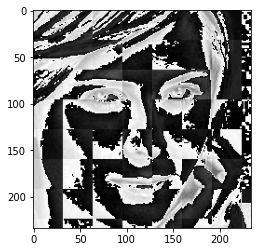

In [44]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [45]:
celebrity_file_names_dict

{'roger_federer': ['./images_dataset/cropped/roger_federer/roger_federer17.png',
  './images_dataset/cropped/roger_federer/roger_federer19.png',
  './images_dataset/cropped/roger_federer/roger_federer23.png',
  './images_dataset/cropped/roger_federer/roger_federer12.png',
  './images_dataset/cropped/roger_federer/roger_federer6.png',
  './images_dataset/cropped/roger_federer/roger_federer11.png',
  './images_dataset/cropped/roger_federer/roger_federer28.png',
  './images_dataset/cropped/roger_federer/roger_federer27.png',
  './images_dataset/cropped/roger_federer/roger_federer1.png',
  './images_dataset/cropped/roger_federer/roger_federer8.png',
  './images_dataset/cropped/roger_federer/roger_federer7.png',
  './images_dataset/cropped/roger_federer/roger_federer4.png',
  './images_dataset/cropped/roger_federer/roger_federer26.png',
  './images_dataset/cropped/roger_federer/roger_federer10.png',
  './images_dataset/cropped/roger_federer/roger_federer30.png',
  './images_dataset/cropped/

In [46]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
    
class_dict

{'roger_federer': 0,
 'serena_williams': 1,
 'lionel_messi': 2,
 'maria_sharapova': 3,
 'virat_kohli': 4}

In [47]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [48]:
len(X) # list

187

In [49]:
len(X[0]) # 32*32*3 + 32*32

4096

In [50]:
X[0]

array([[ 40],
       [ 39],
       [ 48],
       ...,
       [  2],
       [180],
       [ 10]], dtype=uint8)

In [51]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(187, 4096)

In [52]:
X[0]

array([ 40.,  39.,  48., ...,   2., 180.,  10.])

 ### Model Training
 
 we will use SVM with rvf kernel tuned with heuristic finetuning

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7659574468085106

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.62      0.56      0.59         9
           2       0.75      0.75      0.75         8
           3       0.90      0.82      0.86        11
           4       0.69      0.92      0.79        12

    accuracy                           0.77        47
   macro avg       0.79      0.75      0.76        47
weighted avg       0.78      0.77      0.77        47



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [56]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [60]:
scores = []
best_estimators = {}

import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.742857,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.564286,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.771429,{'logisticregression__C': 1}


In [61]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [62]:
best_estimators['svm'].score(X_test,y_test)

0.7659574468085106

In [63]:
best_estimators['random_forest'].score(X_test,y_test)

0.6595744680851063

In [64]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8085106382978723

In [69]:
best_clf = best_estimators['logistic_regression']

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  1,  0,  0,  0],
       [ 1,  7,  0,  1,  0],
       [ 1,  1,  5,  1,  0],
       [ 0,  0,  0, 11,  0],
       [ 3,  0,  0,  0,  9]])

Text(69.0, 0.5, 'Truth')

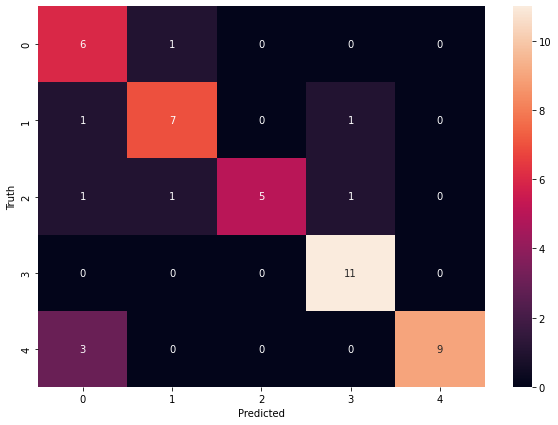

In [71]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
class_dict

{'roger_federer': 0,
 'serena_williams': 1,
 'lionel_messi': 2,
 'maria_sharapova': 3,
 'virat_kohli': 4}

### Save Model

In [73]:
import joblib
# save model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### Save class dictionary

In [75]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))